In [1]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import interact
import ipywidgets as widgets

In [2]:
df = pd.read_csv("C:\\Users\\Manish\\Car_sales (1).csv")
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [4]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [5]:
# drop of column with maximum null values
df = df.drop(['__year_resale_value'], axis = 1)

# drop NaN values
df = df.dropna()

df.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


In [6]:
new_df=df

In [7]:
def fit_and_plot_clustering(df, clusterer,x,y, print_number=False):
    df = df.copy()
    df['clusterid'] = clusterer.fit_predict(df[[x, y]])
    n_clusters = df['clusterid'].max() + 1
    n_outliers = np.sum(df['clusterid'] == -1)
    if print_number:
        print(f'number of clusters: {n_clusters}\nnumber of outliers: {n_outliers}')
    cmap = plt.get_cmap('Set1', n_clusters+1)
    ax = df.plot(kind='scatter', x=x, y=y, c='clusterid', cmap=cmap, s=80, colorbar=False)
    ax.grid()
    
    return df
    
style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')

In [8]:
car_all_std = df

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scale_columns = ["Horsepower","Price_in_thousands"]
car_all_std[scale_columns] = std_scaler.fit_transform(car_all_std[scale_columns])

car_all_std.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,-0.405800,1.8,-0.791180,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,0.074328,3.2,0.709634,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,Passenger,1.020668,3.5,0.444785,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,-0.232537,1.8,-0.614614,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,Passenger,0.460518,2.8,0.268218,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


In [9]:
car_all=df.select_dtypes('number')

In [10]:
car_all

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,-0.405800,1.8,-0.791180,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,0.074328,3.2,0.709634,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,8.588,1.020668,3.5,0.444785,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,-0.232537,1.8,-0.614614,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,0.460518,2.8,0.268218,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,-0.204007,1.9,-0.438047,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,0.011702,2.4,-0.296794,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,0.102161,2.4,-0.296794,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,1.264211,2.3,0.903857,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


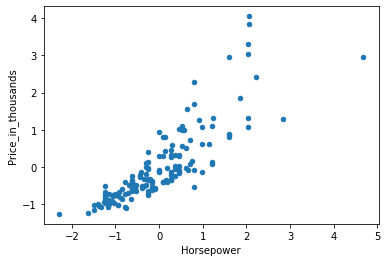

In [11]:
car_all_std.plot.scatter(x= 'Horsepower',y = 'Price_in_thousands')
plt.show()

# Task 1 AND TASK - 2

In [13]:
from sklearn.cluster import DBSCAN
                                                         
df  = car_all[scale_columns]                


def plot_dbscan(eps = 0.3, min_samples = 10):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    lable_df = fit_and_plot_clustering(car_all, dbscan,'Horsepower','Price_in_thousands',  print_number=True)
    

i = interact(plot_dbscan 
            , eps=widgets.SelectionSlider(options=np.arange(0.1,1.5,0.1), description='Epsilon', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , min_samples=widgets.SelectionSlider(options=range(1, 21), description='Minimum of samples', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
        );  

interactive(children=(SelectionSlider(continuous_update=False, description='Epsilon', layout=Layout(width='400…

### Here the best hyperparameter setting is Epsilon:- 0.8 and min_samples is 5 which is the given semantice interpretation given to the obtained clusters

### HDBSCAN

In [20]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size = 70).fit(car_all)
clusterer 

HDBSCAN(min_cluster_size=70)

In [21]:
clusterer.outlier_scores_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.38158751, 0.        , 0.        , 0.        , 0.32287889,
       0.        , 0.        , 0.28717738, 0.27083297, 0.18136137,
       0.        , 0.15206476, 0.60740508, 0.57137463, 0.        ,
       0.        , 0.        , 0.39028407, 0.02412577, 0.41845609,
       0.44318078, 0.        , 0.        , 0.        , 0.        ,
       0.08573144, 0.        , 0.26501425, 0.        , 0.12852642,
       0.62599078, 0.7729542 , 0.        , 0.03783243, 0.51216401,
       0.42874049, 0.69445686, 0.26111667, 0.47451427, 0.        ,
       0.78457277, 0.68626119, 0.17768959, 0.81188121, 0.63755705,
       0.55957079, 0.7575289 , 0.90924097, 0.72874834, 0.76716786,
       0.19395566, 0.        , 0.23313845, 0.2008928 , 0.16175748,
       0.        , 0.        , 0.        , 0.27070083, 0.27460861,
       0.63853393, 0.        , 0.        , 0.29863066, 0.27798035,
       0.05888294, 0.        , 0.20409119, 0.13631043, 0.30141

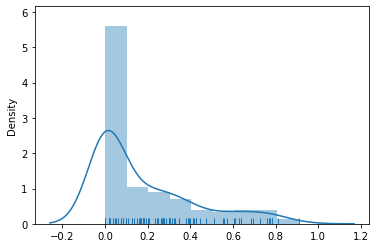

In [22]:
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug = True);  

# TASK - 3

n_clusters= 1 linkage= ward


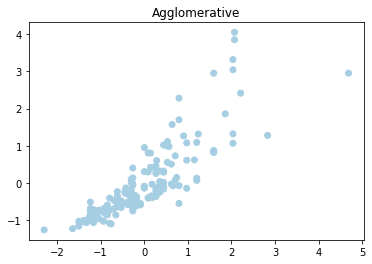

n_clusters= 2 linkage= ward


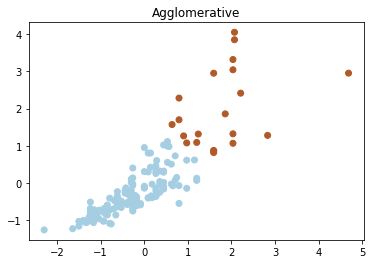

n_clusters= 3 linkage= ward


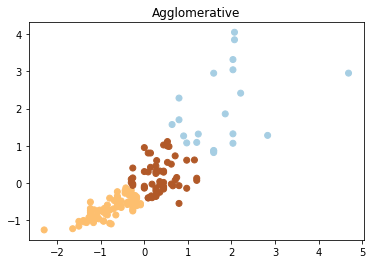

n_clusters= 4 linkage= ward


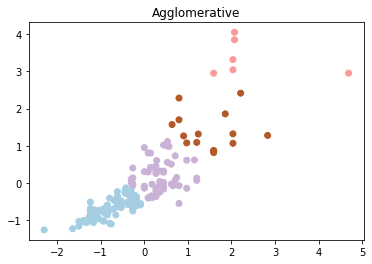

n_clusters= 5 linkage= ward


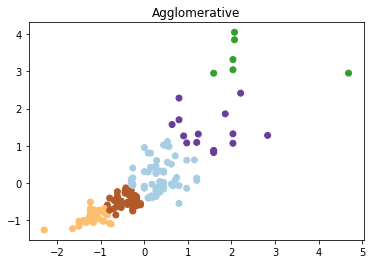

n_clusters= 1 linkage= complete


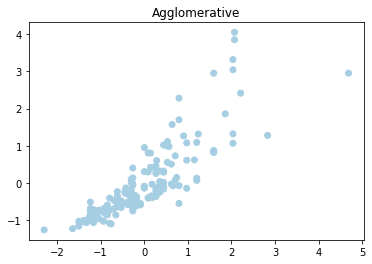

n_clusters= 2 linkage= complete


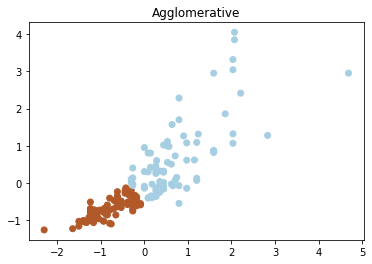

n_clusters= 3 linkage= complete


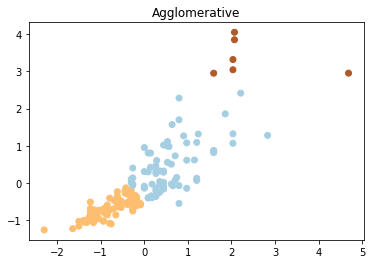

n_clusters= 4 linkage= complete


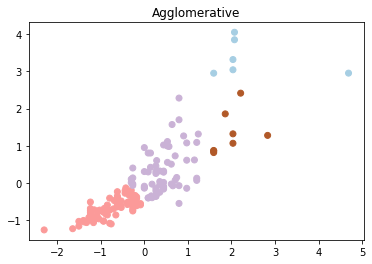

n_clusters= 5 linkage= complete


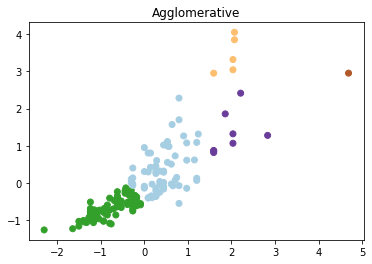

n_clusters= 1 linkage= average


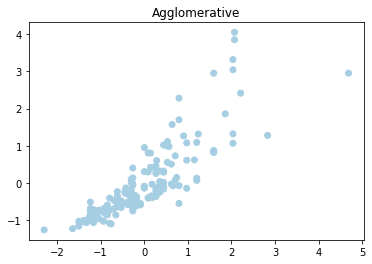

n_clusters= 2 linkage= average


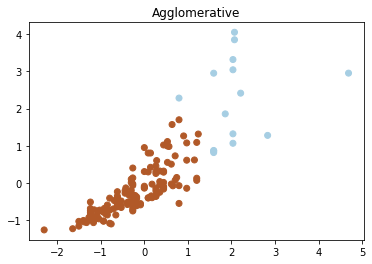

n_clusters= 3 linkage= average


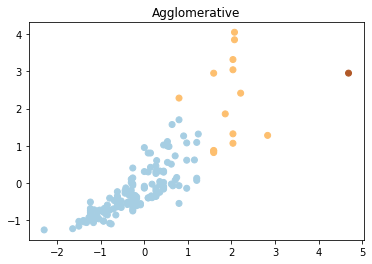

n_clusters= 4 linkage= average


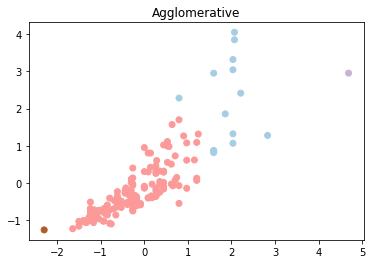

n_clusters= 5 linkage= average


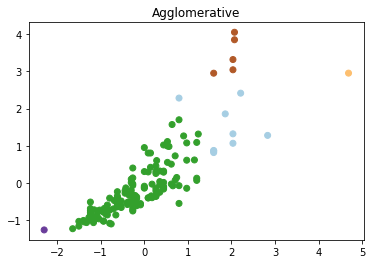

n_clusters= 1 linkage= single


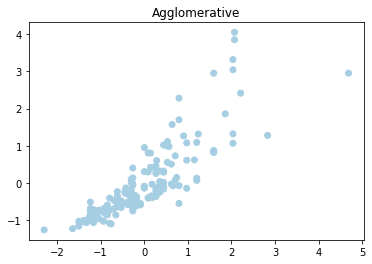

n_clusters= 2 linkage= single


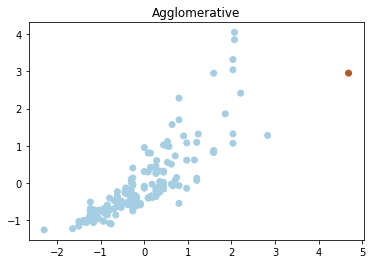

n_clusters= 3 linkage= single


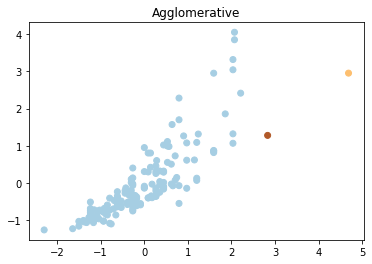

n_clusters= 4 linkage= single


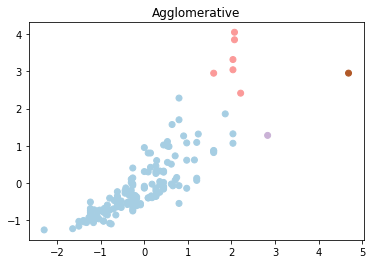

n_clusters= 5 linkage= single


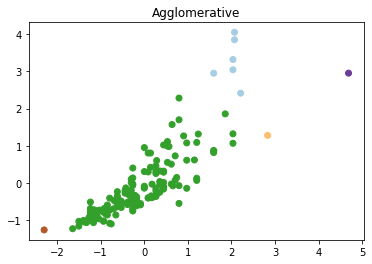

In [23]:
from sklearn.cluster import  AgglomerativeClustering
linkage=['ward','complete','average','single']
n_clusters=[1,2,3,4,5]
for x in linkage:
    for y in n_clusters:
        model=AgglomerativeClustering(n_clusters=y,linkage=x)
        model=model.fit_predict(new_df[scale_columns])
        Model=model
        print('n_clusters=',y,'linkage=',x)
        plt.scatter(new_df['Horsepower'],new_df['Price_in_thousands'],c=Model,cmap='Paired')
        plt.title('Agglomerative')
        plt.show()

# TASK - 4 

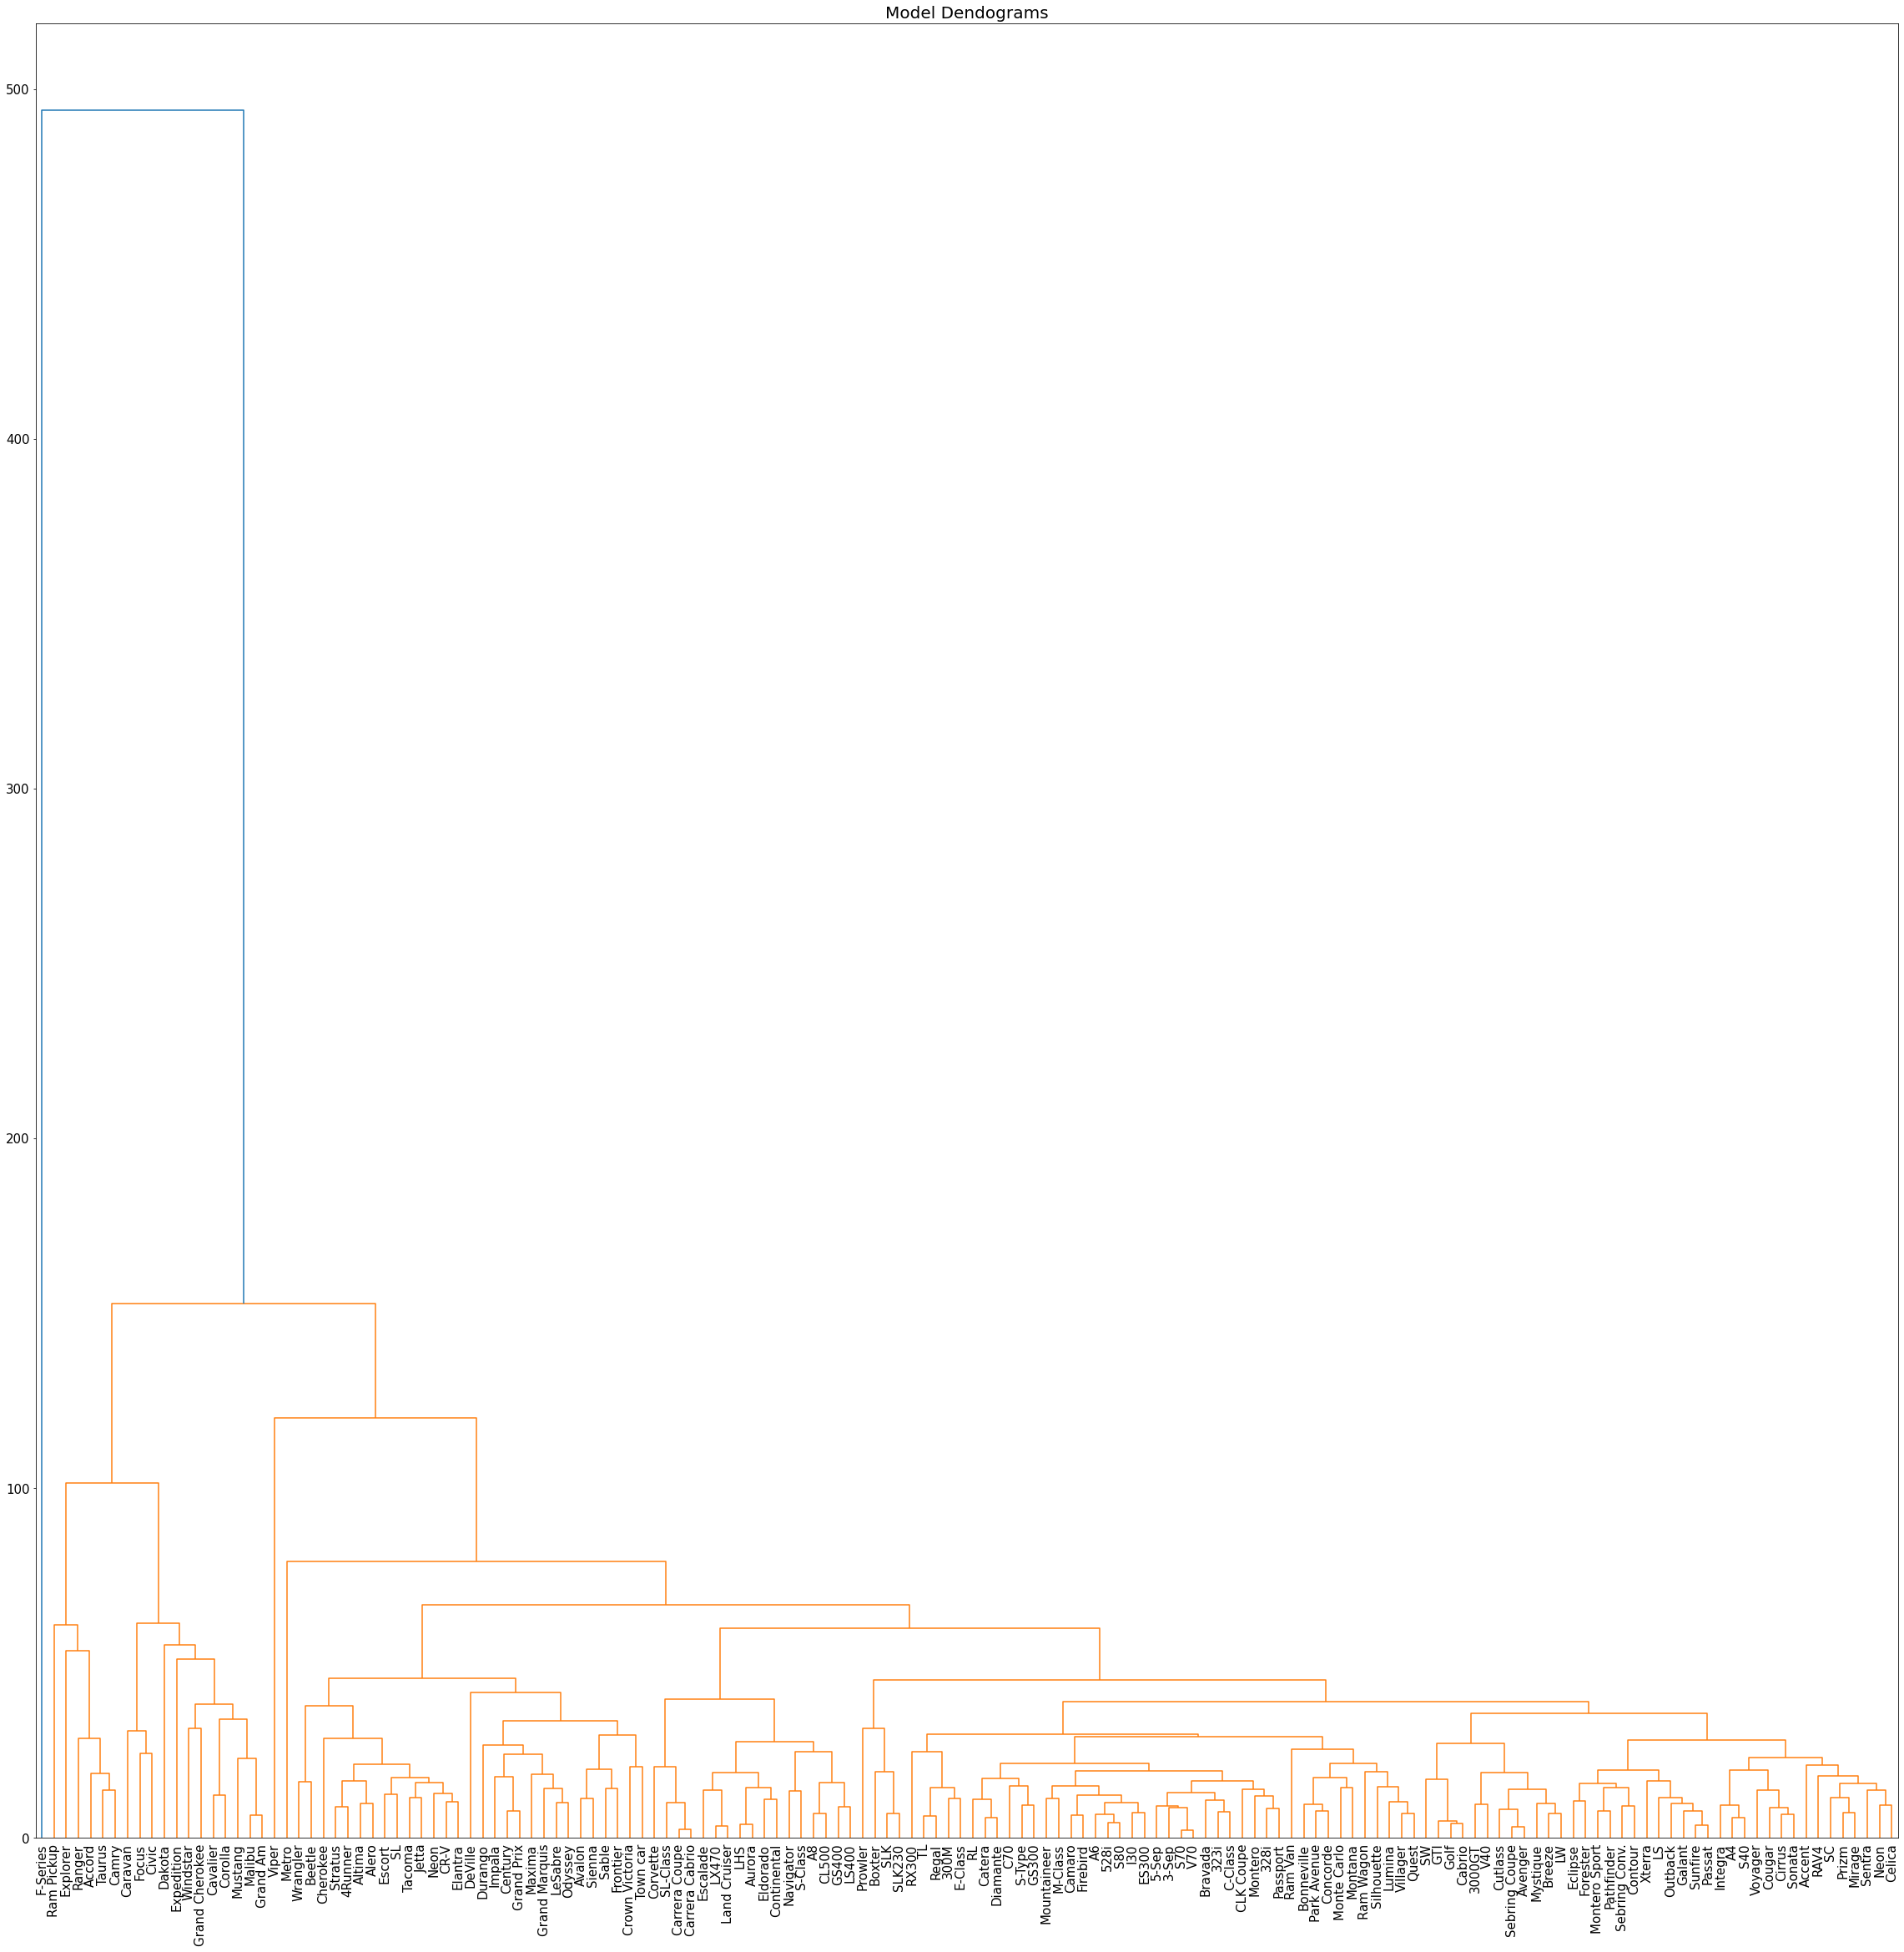

In [24]:
linkage=['ward','complete','average','single']
n_clusters=[1,2,3,4,5]
for x in linkage:
    for y in n_clusters:
        model=AgglomerativeClustering(n_clusters=y,linkage=x)
        model=model.fit_predict(new_df[scale_columns])
        Model=model

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(40, 40))
plt.title("Model Dendograms",size=20)

car_all.index= new_df['Model']         

dend = shc.dendrogram(shc.linkage(car_all, method='average'),labels=car_all.index,orientation= 'top')
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)   
